<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%ED%8A%B9%EC%A0%95%EC%A7%80%EC%97%AD_%EA%B5%AC%EB%8F%99%EB%B3%84_%EC%B4%9D_%EC%9D%B8%EA%B5%AC%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###from https://jumin.mois.go.kr/index.jsp > 주민등록 인구 및 세대현황 -> 전체읍면동현황

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import pandas as pd
read_df = pd.read_csv('./202206_202206_주민등록인구및세대현황_월간.csv', encoding='cp949')

read_df

,행정구역,2022년06월_총인구수,2022년06월_세대수,2022년06월_세대당 인구,2022년06월_남자 인구수,2022년06월_여자 인구수,2022년06월_남여 비율
0,서울특별시 (1100000000),"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94
1,서울특별시 종로구 (1111000000),"143,624","73,728",1.95,"69,513","74,111",0.94
2,서울특별시 종로구 청운효자동(1111051500),"11,803","5,210",2.27,"5,430","6,373",0.85
3,서울특별시 종로구 사직동(1111053000),"9,310","4,674",1.99,"4,154","5,156",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,386","1,193",2.00,"1,130","1,256",0.90
...,...,...,...,...,...,...,...
3860,제주특별자치도 서귀포시 서홍동(5013058000),"11,254","4,644",2.42,"5,556","5,698",0.98
3861,제주특별자치도 서귀포시 대륜동(5013059000),"15,411","6,923",2.23,"7,802","7,609",1.03
3862,제주특별자치도 서귀포시 대천동(5013060000),"13,802","6,460",2.14,"6,980","6,822",1.02
3863,제주특별자치도 서귀포시 중문동(5013061000),"12,217","5,903",2.07,"6,197","6,020",1.03


##데이터 정리

###컬럼명 정리

In [4]:
def replace_column_name(column_name, split_param='_'):
  split_list = column_name.split(split_param)
  result = split_list[len(split_list)-1]
  return result

In [5]:
read_df.columns = list(map(replace_column_name,list(read_df.columns)))

In [6]:
read_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94
1,서울특별시 종로구 (1111000000),"143,624","73,728",1.95,"69,513","74,111",0.94
2,서울특별시 종로구 청운효자동(1111051500),"11,803","5,210",2.27,"5,430","6,373",0.85
3,서울특별시 종로구 사직동(1111053000),"9,310","4,674",1.99,"4,154","5,156",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,386","1,193",2.00,"1,130","1,256",0.90
...,...,...,...,...,...,...,...
3860,제주특별자치도 서귀포시 서홍동(5013058000),"11,254","4,644",2.42,"5,556","5,698",0.98
3861,제주특별자치도 서귀포시 대륜동(5013059000),"15,411","6,923",2.23,"7,802","7,609",1.03
3862,제주특별자치도 서귀포시 대천동(5013060000),"13,802","6,460",2.14,"6,980","6,822",1.02
3863,제주특별자치도 서귀포시 중문동(5013061000),"12,217","5,903",2.07,"6,197","6,020",1.03


In [7]:
read_df.dtypes

행정구역       object
총인구수       object
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [8]:
change_dtype_columns = ['총인구수','세대수', '남자 인구수', '여자 인구수']
for column in change_dtype_columns:
  read_df[column] = read_df[column].str.replace(',','').astype('int64')
read_df  

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9494807,4464840,2.13,4605655,4889152,0.94
1,서울특별시 종로구 (1111000000),143624,73728,1.95,69513,74111,0.94
2,서울특별시 종로구 청운효자동(1111051500),11803,5210,2.27,5430,6373,0.85
3,서울특별시 종로구 사직동(1111053000),9310,4674,1.99,4154,5156,0.81
4,서울특별시 종로구 삼청동(1111054000),2386,1193,2.00,1130,1256,0.90
...,...,...,...,...,...,...,...
3860,제주특별자치도 서귀포시 서홍동(5013058000),11254,4644,2.42,5556,5698,0.98
3861,제주특별자치도 서귀포시 대륜동(5013059000),15411,6923,2.23,7802,7609,1.03
3862,제주특별자치도 서귀포시 대천동(5013060000),13802,6460,2.14,6980,6822,1.02
3863,제주특별자치도 서귀포시 중문동(5013061000),12217,5903,2.07,6197,6020,1.03


##특정 지역 구별 인구수 분석

In [54]:
# 서울
condition = read_df['행정구역'].str.find('구 (11') > 0

contents_df = read_df[condition].copy()
# contents_df
contents_df.shape

(25, 7)

In [55]:
contents_df['구'] = contents_df['행정구역'].str.split(' ').str[1]

In [48]:
contents_df.columns

Index(['행정구역', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율', '구'], dtype='object')

###구별 시각화

In [49]:
contents_df.sort_values('총인구수', ascending=False, inplace=True)
contents_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,구
404,서울특별시 송파구 (1171000000),662961,286119,2.32,319397,343564,0.93,송파구
256,서울특별시 강서구 (1150000000),573045,274301,2.09,275233,297812,0.92,강서구
381,서울특별시 강남구 (1168000000),531777,234885,2.26,254333,277444,0.92,강남구
168,서울특별시 노원구 (1135000000),508066,218637,2.32,244387,263679,0.93,노원구
340,서울특별시 관악구 (1162000000),486946,281423,1.73,244722,242224,1.01,관악구
188,서울특별시 은평구 (1138000000),473674,216455,2.19,226148,247526,0.91,은평구
432,서울특별시 강동구 (1174000000),461630,202861,2.28,226158,235472,0.96,강동구
237,서울특별시 양천구 (1147000000),444548,181987,2.44,217704,226844,0.96,양천구
118,서울특별시 성북구 (1129000000),433559,198089,2.19,208790,224769,0.93,성북구
362,서울특별시 서초구 (1165000000),407672,169518,2.40,194819,212853,0.92,서초구


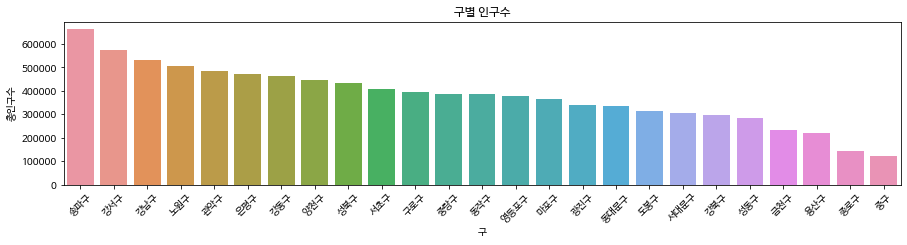

In [50]:
import seaborn as sns
sns.barplot(data=contents_df, x='구', y='총인구수')
plt.title('구별 인구수')
plt.xticks(rotation=45)
plt.show()

##특정 지역 동별 인구수 분석

In [57]:
# 서울 송파구
condition = read_df['행정구역'].str.find('동(1171') > 0

area_df = read_df[condition].copy()
# area_df
area_df.shape

(27, 7)

In [59]:
area_df['동'] = area_df['행정구역'].str.split(' ').str[2].str.split('(').str[0]
area_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,동
405,서울특별시 송파구 풍납1동(1171051000),12644,5927,2.13,6219,6425,0.97,풍납1동
406,서울특별시 송파구 풍납2동(1171052000),24573,10983,2.24,11651,12922,0.90,풍납2동
407,서울특별시 송파구 거여1동(1171053100),12337,5641,2.19,6197,6140,1.01,거여1동
408,서울특별시 송파구 거여2동(1171053200),23410,9902,2.36,11483,11927,0.96,거여2동
409,서울특별시 송파구 마천1동(1171054000),18746,8837,2.12,9570,9176,1.04,마천1동
410,서울특별시 송파구 마천2동(1171055000),18332,8694,2.11,9351,8981,1.04,마천2동
411,서울특별시 송파구 방이1동(1171056100),15510,6229,2.49,7485,8025,0.93,방이1동
412,서울특별시 송파구 방이2동(1171056200),26277,15294,1.72,12134,14143,0.86,방이2동
413,서울특별시 송파구 오륜동(1171056600),17871,5934,3.01,8717,9154,0.95,오륜동
414,서울특별시 송파구 오금동(1171057000),38121,15688,2.43,18495,19626,0.94,오금동


In [60]:
area_df.columns

Index(['행정구역', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율', '동'], dtype='object')

###동별 시각화

In [61]:
area_df.sort_values('총인구수', ascending=False, inplace=True)
area_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,동
425,서울특별시 송파구 위례동(1171064700),43884,14191,3.09,21400,22484,0.95,위례동
414,서울특별시 송파구 오금동(1171057000),38121,15688,2.43,18495,19626,0.94,오금동
427,서울특별시 송파구 잠실2동(1171067000),34892,11609,3.01,16652,18240,0.91,잠실2동
428,서울특별시 송파구 잠실3동(1171068000),34139,11914,2.87,16245,17894,0.91,잠실3동
421,서울특별시 송파구 가락2동(1171063200),31643,12378,2.56,15487,16156,0.96,가락2동
417,서울특별시 송파구 석촌동(1171060000),31391,16962,1.85,14947,16444,0.91,석촌동
418,서울특별시 송파구 삼전동(1171061000),29896,16055,1.86,13988,15908,0.88,삼전동
424,서울특별시 송파구 장지동(1171064600),29193,12146,2.40,14097,15096,0.93,장지동
423,서울특별시 송파구 문정2동(1171064200),28739,15713,1.83,13148,15591,0.84,문정2동
426,서울특별시 송파구 잠실본동(1171065000),27875,15646,1.78,13332,14543,0.92,잠실본동


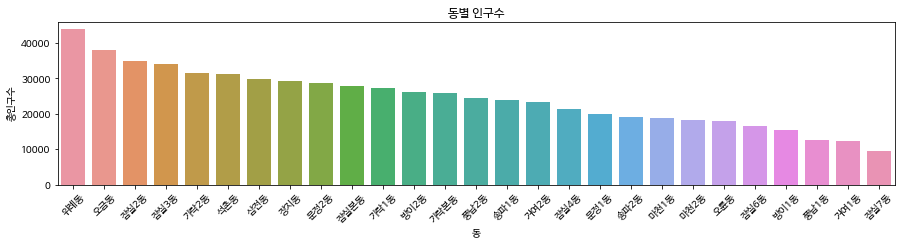

In [62]:
import seaborn as sns
sns.barplot(data=area_df, x='동', y='총인구수')
plt.title('동별 인구수')
plt.xticks(rotation=45)
plt.show()